Initial data transformation :   
    Data Preparation: Collecting and preprocessing data, including tokenization, removing stopwords, and vectorization.  

Plotting features  
Text analysis  
Logistic Regression model  
XGBoost model  
Random Forest Model   
Naive Baiyes Model  
Bi-directional LSTM  
Final Remarks  

The main objective is to present a simple NLP project and to practice the main uses of libraries such as wordcloud,sklearn, nltk and re.

In [31]:
import numpy as np
import pandas as pd

from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties


from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost

import re #Regular expressions
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gueye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gueye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\gueye\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\gueye\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\gueye\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\gueye\AppData\Roa

False

In [10]:
#Validation dataset
val=pd.read_csv('C:/Users/gueye/Desktop/Babs_1v9_Journey/Twitter-Sentiment-Analysis/src/data/twitter_validation.csv', delimiter=',' ,header=None)
#Full dataset for Train-Test
train=pd.read_csv("C:/Users/gueye/Desktop/Babs_1v9_Journey/Twitter-Sentiment-Analysis/src/data/twitter_training.csv", delimiter=',', header=None)

Later, the columns were renamed to represent the given data of tweets. But, with the first 5 rows analysis, it was recognized that positive sentiment was assigned to a "kill" thread related to a videogame. Even with this in consideration, the modeling, in this case, will the same as a traditional NLP project.

In [11]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [13]:
train_data=train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [14]:
val_data=val
val_data

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           74682 non-null  int64 
 1   information  74682 non-null  object
 2   type         74682 non-null  object
 3   text         73996 non-null  object
 4   lower        74682 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [18]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   information  1000 non-null   object
 2   type         1000 non-null   object
 3   text         1000 non-null   object
 4   lower        1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


To prepare the data for the text analysis an additional row was created using the method of str.lower.  
However, as there were some texts with only numerical values (such as one that only had a 2 as the tweet) an additional function was used for transforming all the data to string.  
Then, a regex expression erased the special characters as it is common to have digitation problems on Twitter.

In [15]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

The differences between the two text columns are presented in the next table.

In [16]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [21]:
train_data['type'].value_counts()


type
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In Train Data we have : 
- More Negative than Positive.  
- Positive < Neutral << Irrelevant  

In [22]:
val_data['type'].value_counts()

type
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In Validation Data we have : 
* 28% Neutral,  
* 27% Positive,  
* 26% Negative   
* 17% Irrevelant  

## 2. Plotting features
As to identify the main words that were used per label, a word_cloud was used to see which are the most important words on the train data.  
For example, on the positive label words such as love and game were mostly used alongside a wide variety of words classified as "good sentiments".  

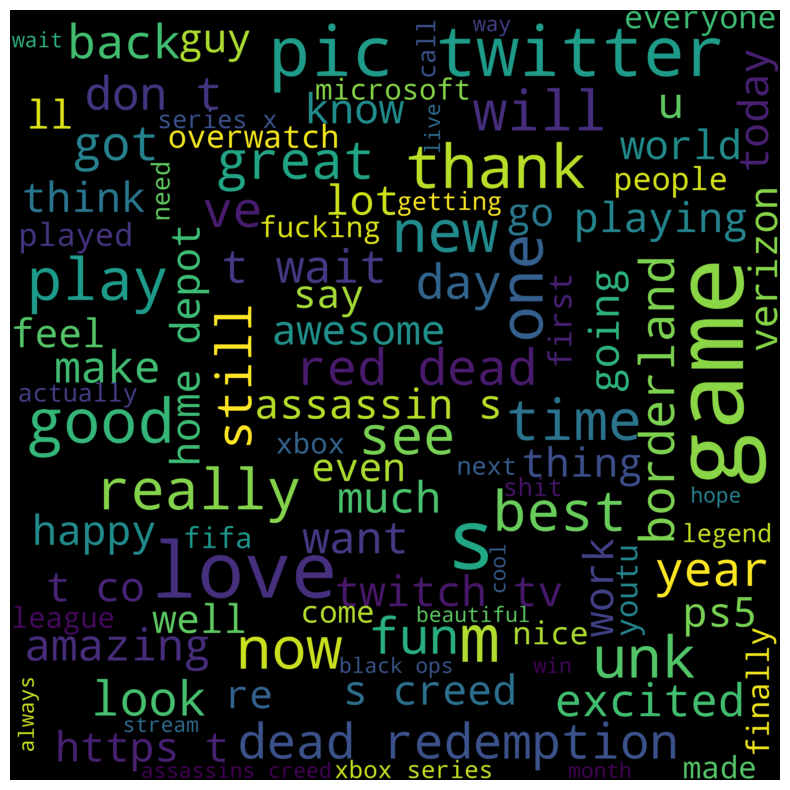

In [23]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As for the negative tweets, some curse words were the most important while the names of some games and industries were also very used, such as facebook and eamaddennfl.

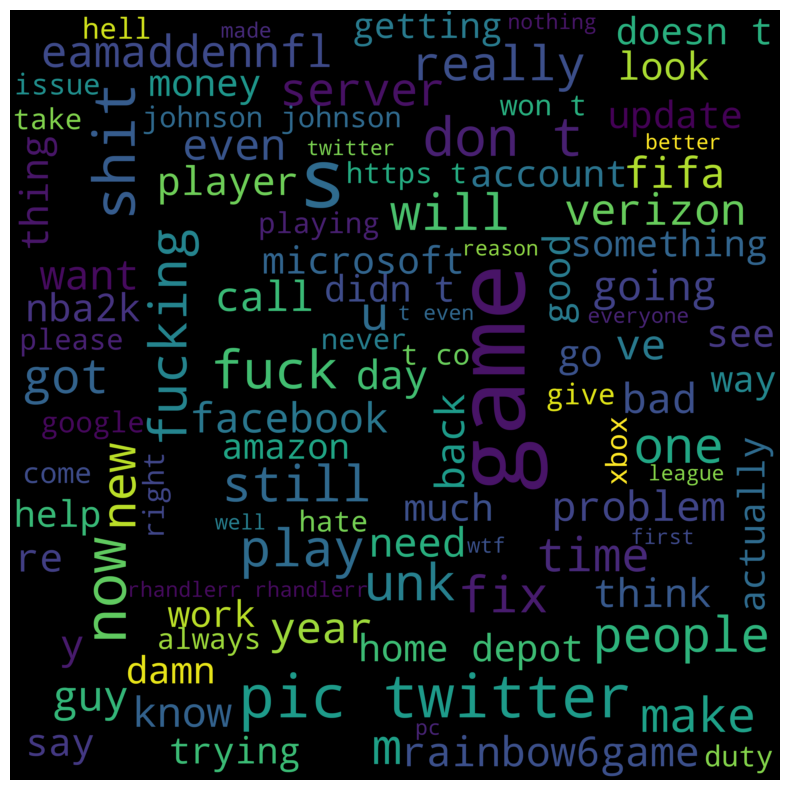

In [24]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

train_data["type"]=="Irrelevant"]

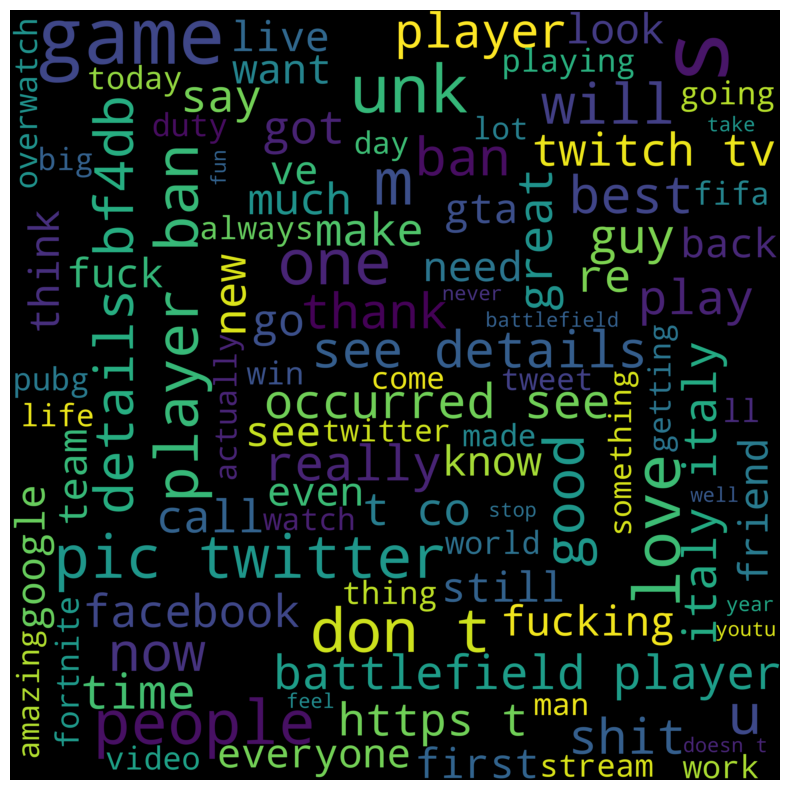

In [25]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The irrelevant tweets show a similar trend as negative ones, something that will impact the overall prediction performance.

Neutral

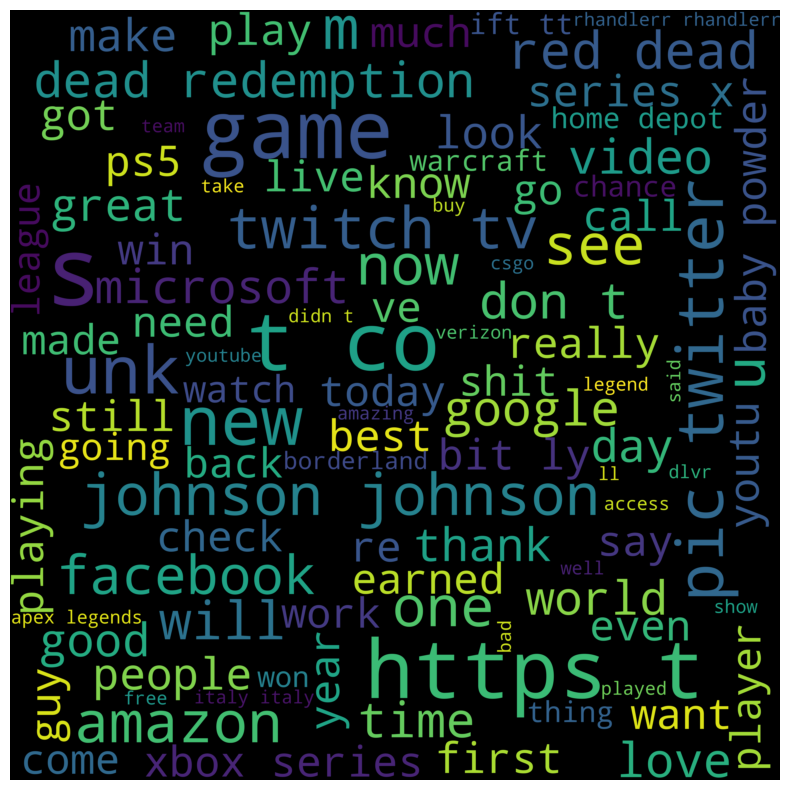

In [26]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Then, on the neutral side, there are almost no curse words and the most important ones are different from the other 3 categories.

In [27]:
#Count information per category
plot1=train.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


Finally, in this section, the information was grouped by the brand (or in this case the column information) to make a barplot that shows the number of tweets for each one.

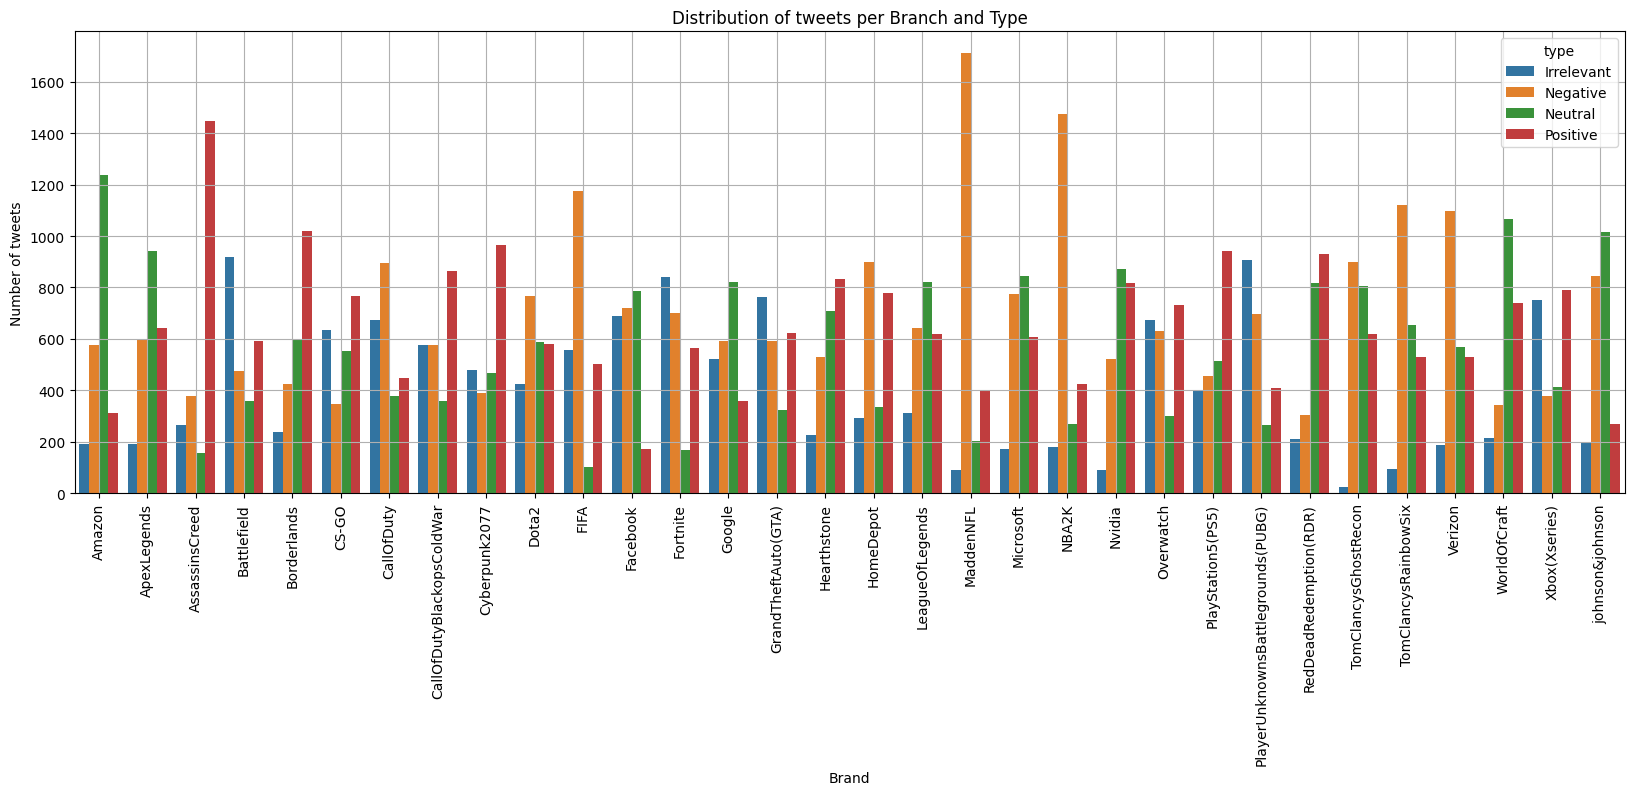

In [28]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

As an interesting fact, the number of modified texts coincides with the id.  
For this reason, as the ID is unique, the following barplot shows that for games such as MaddenNFL and NBA2K the number of negative tweets is the highest while on the other brands the trend is different.

## 3. Text analysis
With the clean text, the initial number of unique tokens was counted to identify the model complexity. As presented, there are more than 30 thousand unique words.

In [32]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


The tokens_text variable groups all the texts by the different words stored on a List.

In [35]:
tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [36]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

## 4. Logistic Regression model
For the main regression model, it was used a simple Logistic Regression of the sklearn library alongside the Bag of Words (BoW) approach.  
This last method helps to classify and group the relevant data to help the model identify the proper trends.  

On this first BoW, the stopwords were considered alongside a default ngram of 1 (unigrams).

In [37]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

Then, the main data was split on train and test datasets alongside the encoding of the words by using the training dataset as a reference:

In [38]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [40]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

In [41]:
X_test_bow

<14937x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 161222 stored elements in Compressed Sparse Row format>

In [42]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

The total number of tweets for each category shows that negative and positive are the most registered while the irrelevant is the lowest.

In [43]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

type
Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: count, dtype: float64

In [46]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=800)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  83.65133560956015


In [47]:
#Validation data
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

In [48]:
X_val_bow

<1000x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 12913 stored elements in Compressed Sparse Row format>

In [49]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  93.4


With this data, the Logistic Regression Model was trained, where accuracy of 83.65% on the test dataset was obtained while on the validation dataset this value increased to 93.4%.

In [29]:
from textblob import TextBlob

text = "I love this product. It works amazingly well!"
blob = TextBlob(text)
print(blob.sentiment)

Sentiment(polarity=0.625, subjectivity=0.75)


EDA

In [ ]:
# use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

Apply preprocess function on dataframe

Encoding target column

In [ ]:
le_model = LabelEncoder()
df['Label'] = le_model.fit_transform(df['Label'])

In [ ]:
df.head(5)

Split data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed Text'], df['Label'], test_size=0.2, random_state=42, stratify=df['Label'])


In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Machine Learning Model